# [Exercise 1](https://github.com/kokchun/Deep-learning-AI21/blob/main/Exercises/E1-MLP_image_classification.ipynb)

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

from sklearn.model_selection import train_test_split

## 0

### a)

In [19]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

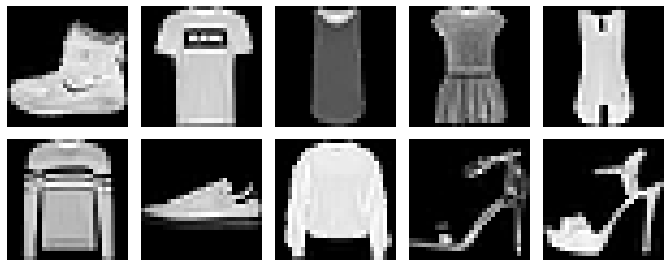

In [20]:
def display_images(data, rows=2, cols=5, figsize=(12,4)):
    fig, axes = plt.subplots(rows,cols, figsize=figsize)

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i, :, :], cmap='gray')
        ax.axis('off')
    fig.subplots_adjust(wspace=0, hspace=.1, bottom=0)

display_images(X_train)

### b)

In [21]:
X_train.max(), X_train.min()

(255, 0)

In [22]:
scaled_X_train = X_train.astype('float32')/255
scaled_X_test = X_test.astype('float32')/255
scaled_X_test.min(), scaled_X_train.max()

(0.0, 1.0)

### c)

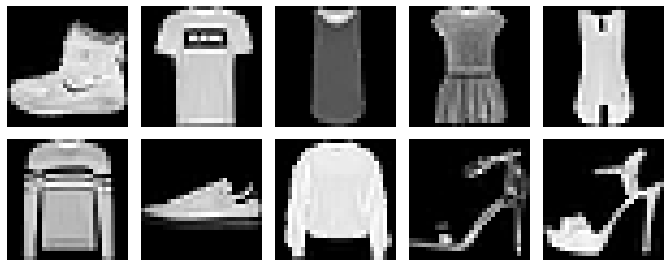

In [23]:
display_images(scaled_X_train)

### d)

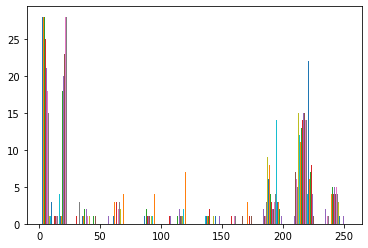

In [24]:

plt.hist(X_train[1]);

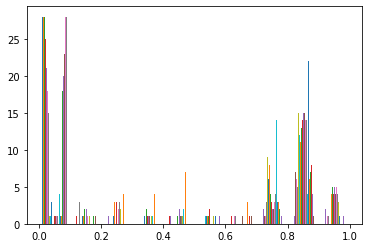

In [25]:
plt.hist(scaled_X_train[1]);

### e)

Yes it's balanced as there is the same amount of samples for each category

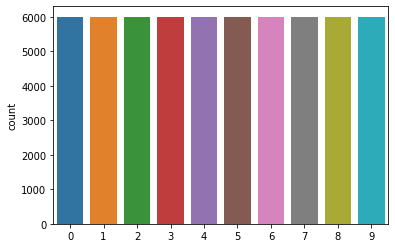

In [26]:
sns.countplot(x=y_train);

## 2

### a, b)

In [31]:
def model_image_28x28_10_classes(layers: list, name="mlp_model"):
    model = Sequential(
        [Flatten(input_shape=(28, 28), name="input_layer")]
        + layers
        + [Dense(10, activation="softmax", name="output_layer")],
        name=name,
    )
    model.compile(
        loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
    )
    model.summary()
    return model


def plot_metrics(model):
    metrics = pd.DataFrame(model.history.history)
    metrics.index = range(len(metrics))

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    columns = [["loss", "val_loss"], ["accuracy", "val_accuracy"]]
    fig.suptitle(model.name.replace('_', ' '))

    for ax, column in zip(axes, columns):
        metrics.plot(y=column, xlabel="Epochs", ylabel=column[0], ax=ax)


def find_two_closest_geometric_values_of_base_two(target_value):
    current_value = 2
    previous_value = 2

    while current_value < target_value:
        previous_value = current_value
        current_value = current_value * 2

    print(previous_value, current_value)

In [32]:
model__no_hidden_layers = model_image_28x28_10_classes([], 'no_hidden_layers')

Model: "no_hidden_layers"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 output_layer (Dense)        (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [33]:
model__no_hidden_layers.fit(scaled_X_train, y_train, validation_split=1/6, epochs=50, verbose=0)

2022-04-27 13:30:25.573717: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-27 13:30:31.634454: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


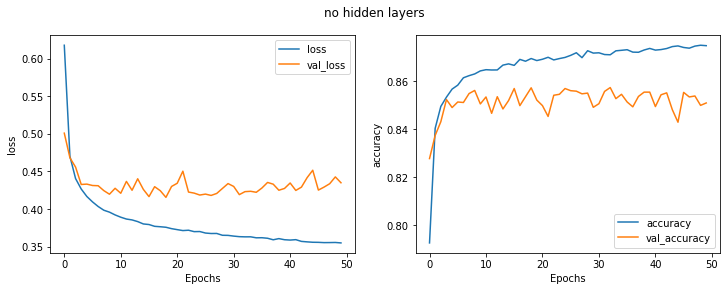

In [34]:
plot_metrics(model__no_hidden_layers)

### c)

#### 1 hidden layer

In [35]:
784/2

392.0

In [36]:
find_two_closest_geometric_values_of_base_two(392)

256 512


In [37]:
model__1_hidden_layer = model_image_28x28_10_classes(
    [
        Dense(256, activation="relu", name="hidden_layer_1"),
    ],
    "1_hidden_layer",
)

Model: "1_hidden_layer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden_layer_1 (Dense)      (None, 256)               200960    
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [44]:
model__3_hidden_layers.fit(scaled_X_train, y_train, validation_split=1/6, epochs=50, verbose=0)

2022-04-27 13:48:06.821678: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-27 13:48:13.859254: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [38]:
model__1_hidden_layer.fit(scaled_X_train, y_train, validation_split=1/6, epochs=50, verbose=0)

2022-04-27 13:36:02.039329: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-27 13:36:08.437282: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


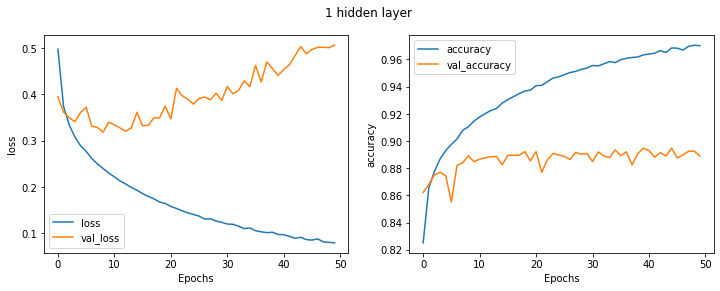

In [39]:
plot_metrics(model__1_hidden_layer)

#### 2 hidden layers

In [40]:
model__2_hidden_layers = model_image_28x28_10_classes(
    [
        Dense(256, activation="relu", name="hidden_layer_1"),
        Dense(128, activation="relu", name="hidden_layer_2"),
    ],
    "2_hidden_layers",
)

Model: "2_hidden_layers"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden_layer_1 (Dense)      (None, 256)               200960    
                                                                 
 hidden_layer_2 (Dense)      (None, 128)               32896     
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [41]:
model__2_hidden_layers.fit(scaled_X_train, y_train, validation_split=1/6, epochs=50, verbose=0)

2022-04-27 13:41:49.099566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-27 13:41:55.714895: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


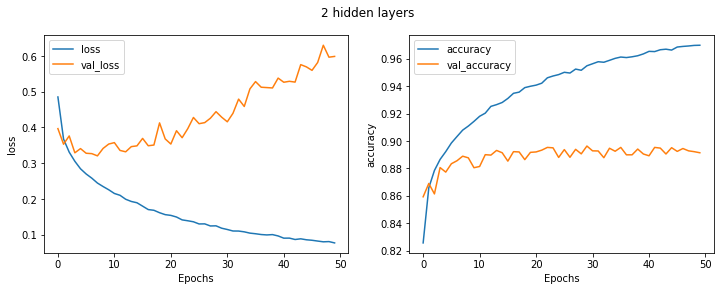

In [42]:
plot_metrics(model__2_hidden_layers)

#### 3 hidden layers

In [43]:
model__3_hidden_layers = model_image_28x28_10_classes(
    [
        Dense(256, activation="relu", name="hidden_layer_1"),
        Dense(128, activation="relu", name="hidden_layer_2"),
        Dense(64, activation="relu", name="hidden_layer_3"),
    ],
    "3_hidden_layers",
)

Model: "3_hidden_layers"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden_layer_1 (Dense)      (None, 256)               200960    
                                                                 
 hidden_layer_2 (Dense)      (None, 128)               32896     
                                                                 
 hidden_layer_3 (Dense)      (None, 64)                8256      
                                                                 
 output_layer (Dense)        (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [54]:
model__3_hidden_layers.fit(scaled_X_train, y_train, validation_split=1/6, epochs=50, verbose=0)

KeyboardInterrupt: 

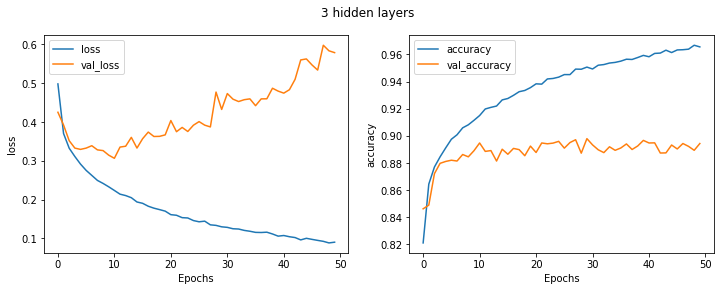

In [ ]:
plot_metrics(model__3_hidden_layers)

## d)

In [57]:
model__4_hidden_and_dropout_layers = model_image_28x28_10_classes(
    [
        Dense(256, activation="relu", name="hidden_layer_1"),
        Dropout(rate=.001),
        Dense(128, activation="relu", name="hidden_layer_2"),
        Dropout(rate=.001),
        Dense(64, activation="relu", name="hidden_layer_3"),
        Dropout(rate=.001),
    ],
    "3_hidden_layers_and_3_dropout_layers",
)

Model: "3_hidden_layers_and_3_dropout_layers"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden_layer_1 (Dense)      (None, 256)               200960    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 hidden_layer_2 (Dense)      (None, 128)               32896     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 hidden_layer_3 (Dense)      (None, 64)                8256      
                                                                 
 dropout_8 (Dropout)         (

In [59]:
model__4_hidden_and_dropout_layers.fit(scaled_X_train, y_train, epochs=30, verbose=0)

2022-04-27 14:07:49.501799: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2022-04-27 14:14:31.069741: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.79      0.83      0.81      1000
           3       0.92      0.87      0.90      1000
           4       0.82      0.82      0.82      1000
           5       0.99      0.95      0.97      1000
           6       0.70      0.73      0.72      1000
           7       0.92      0.98      0.95      1000
           8       0.98      0.97      0.97      1000
           9       0.97      0.94      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



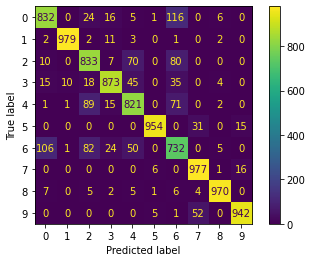

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model__4_hidden_and_dropout_layers.predict(scaled_X_test)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

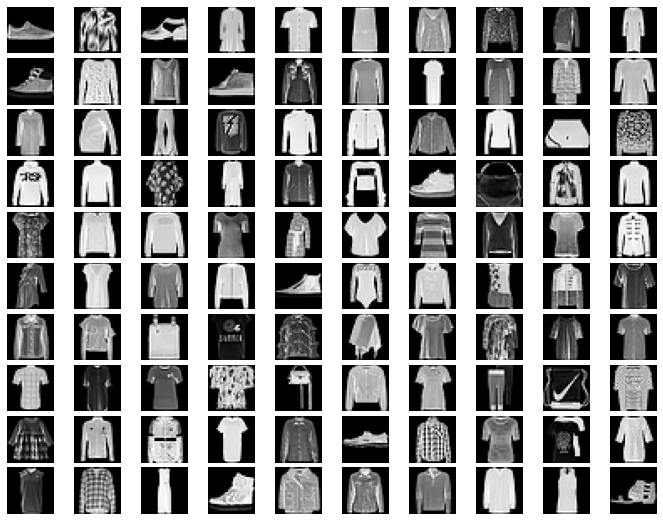

In [63]:
misclassified_indices = np.where(y_pred != y_test)
misclassified_samples = scaled_X_test[misclassified_indices]
display_images(misclassified_samples, 10,10, (12,8))